In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df.size

6912

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.isnull().values.any()

False

In [12]:
corrMtrix  = df.corr()

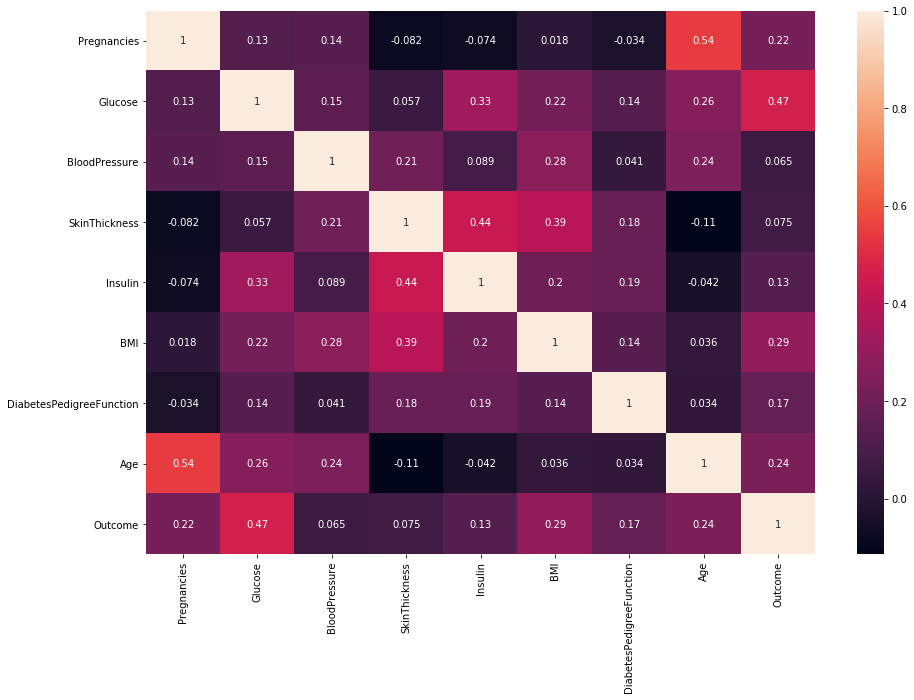

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corrMtrix,annot=True)
plt.show()

# DATA VISUALIZATION

In [14]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

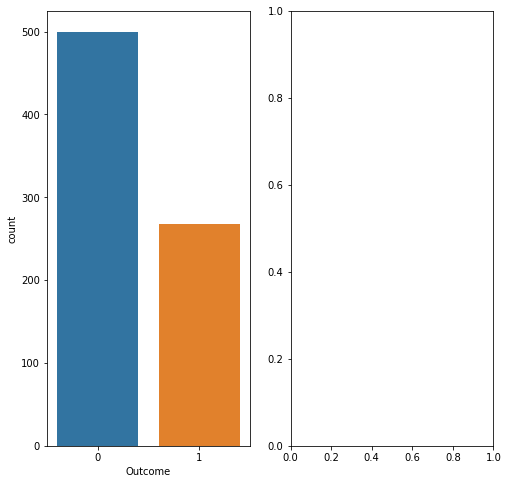

In [15]:
#plotting the frequency of outcome
ax0,ax1=plt.subplots(1,2,figsize=(8,8))
#count of observations in each category using bars
sns.countplot(df['Outcome'],ax=ax1[0])
plt.show()

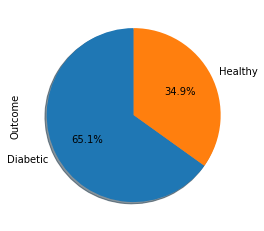

In [16]:
#% of diabetic and healthy person
label='Diabetic','Healthy'
df.Outcome.value_counts().plot.pie(labels=label,autopct='%1.1f%%',shadow=True,startangle=90)

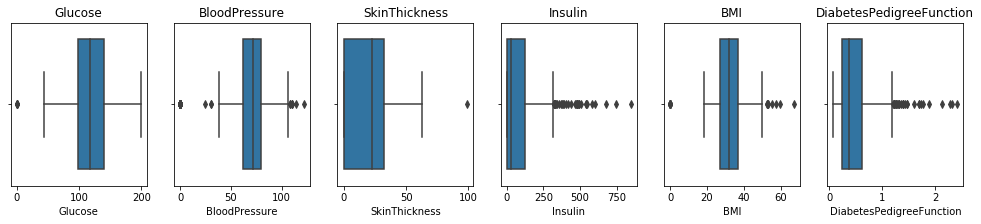

In [17]:
#Visualizing Outliners
fig=plt.figure(figsize=(20,3))
for i in np.arange(1,7):
    data=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

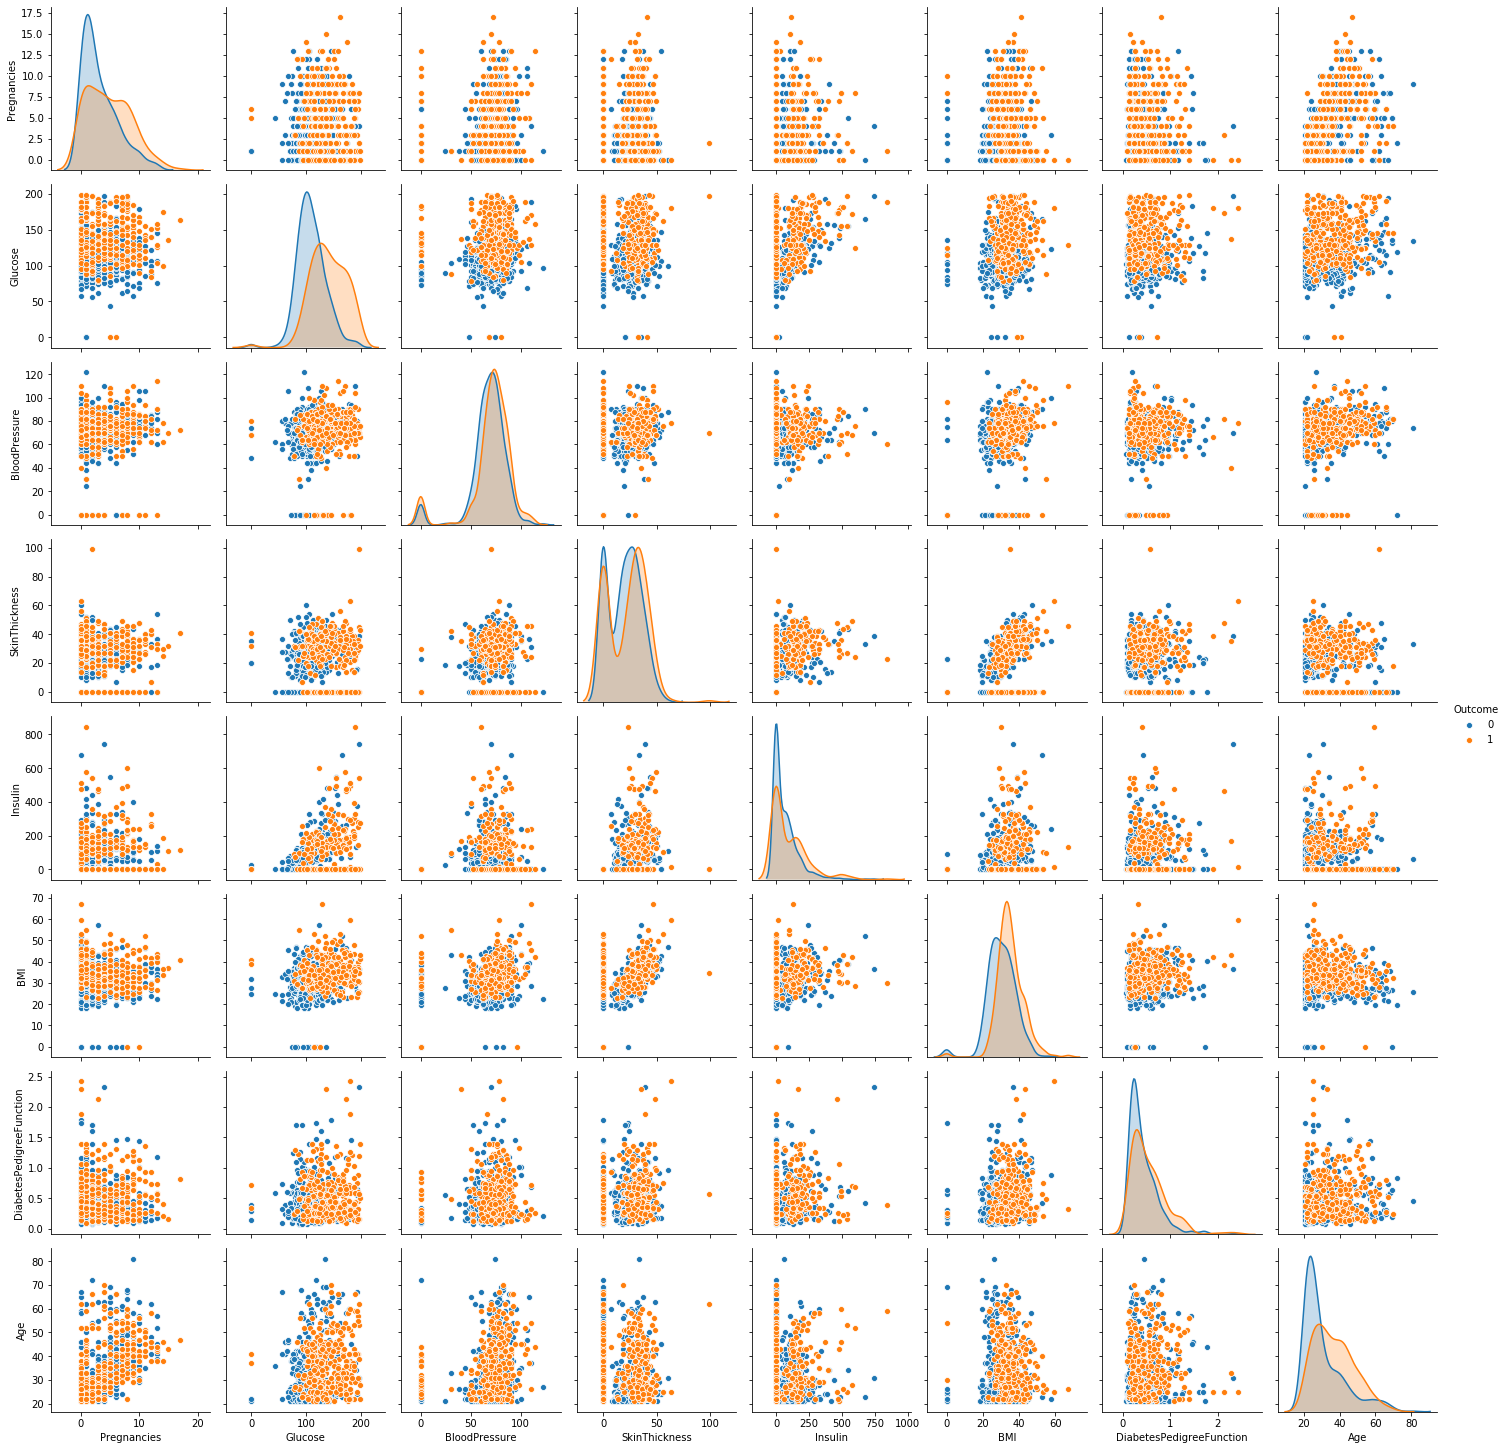

In [18]:
sns.pairplot(df,hue='Outcome')

In [19]:
#Analysis of 'Pregnancies' parameter
pd.crosstab(df['Pregnancies'],df['Outcome'])


Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


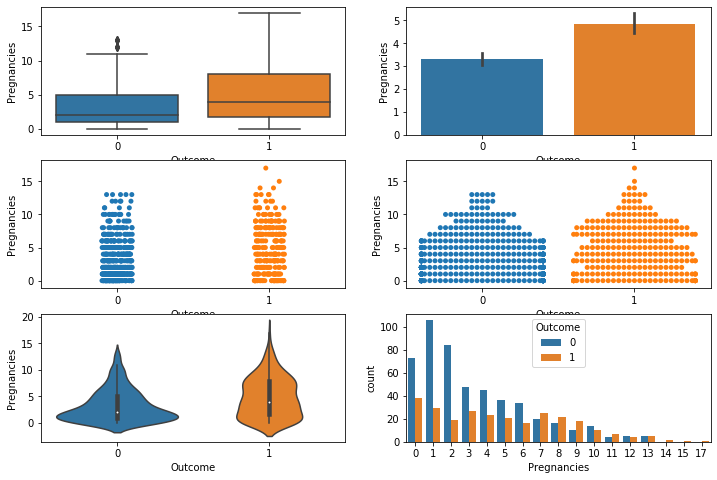

In [20]:
fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Pregnancies'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Pregnancies'], ax=ax2[1][1])
sns.violinplot(df['Outcome'], df['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=df,ax=ax2[2][1])

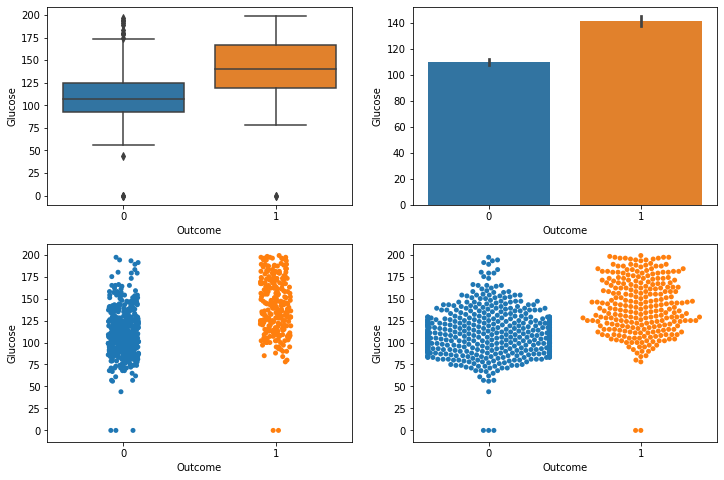

In [21]:
#Analysis of 'Glucose' parameter

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Glucose'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Glucose'], ax=ax2[1][1])

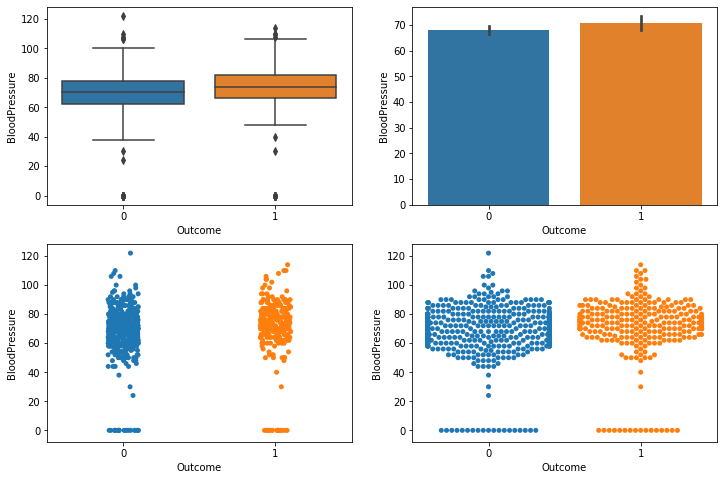

In [22]:
#Analysis of 'BloodPressure' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BloodPressure'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BloodPressure'], ax=ax2[1][1])

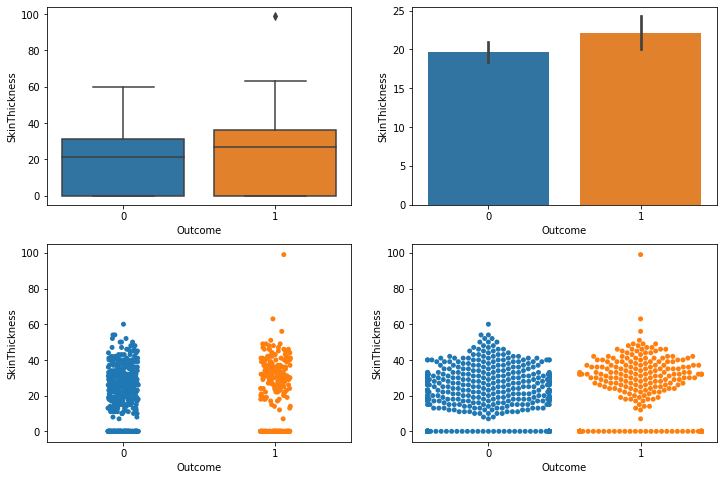

In [23]:
#Analysis of 'SkinThickness' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['SkinThickness'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['SkinThickness'], ax=ax2[1][1])

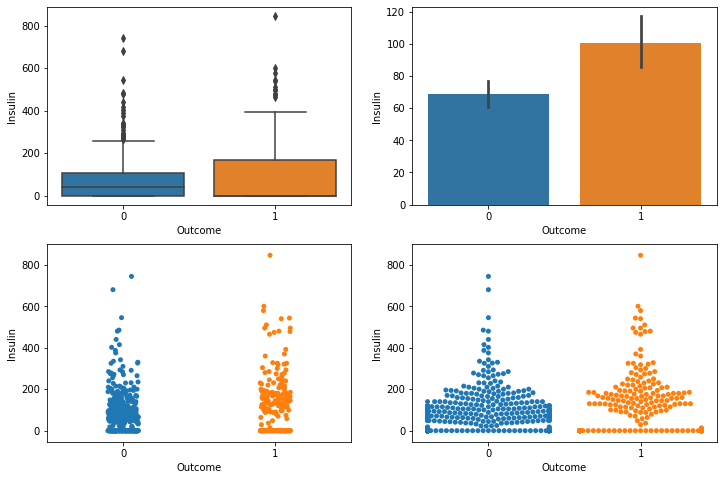

In [24]:
#Analysis of 'Insulin' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Insulin'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Insulin'], ax=ax2[1][1])

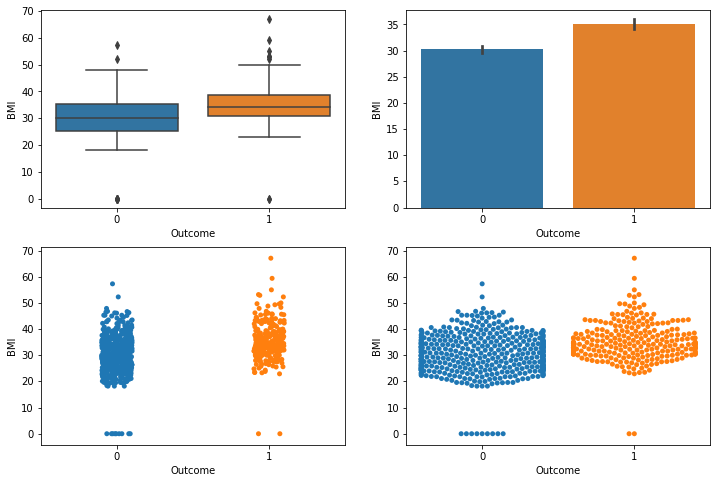

In [25]:
#Analysis of 'BMI' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BMI'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BMI'], ax=ax2[1][1])

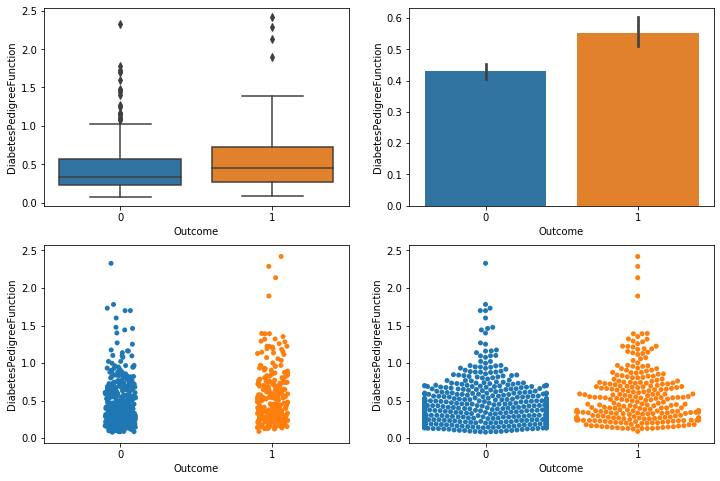

In [26]:
#Analysis of 'DiabetesPedigreeFunction' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['DiabetesPedigreeFunction'], ax=ax2[1][1])

# Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
x = df.drop('Outcome',axis =1)
y = df['Outcome']
xtrain ,xtest , ytrain , ytest = train_test_split(x,y,test_size= 0.3)

In [28]:
xtrain.shape

(537, 8)

In [29]:
xtest.shape

(231, 8)

In [30]:
ytrain.shape

(537,)

In [31]:
ytest.shape

(231,)

# Pre-processing

In [32]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == False])))

total number of rows : 768
number of rows missing glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing age: 0
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0


In [33]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=0,strategy="mean")
xtrain = si.fit_transform(xtrain)

In [34]:
xtest = si.fit_transform(xtest)

# Model Building

# Naive Bayes Algorithm

In [34]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
ytest_pred = naive.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error
print(accuracy_score(ytest,ytest_pred)*100)

65.36796536796537


In [37]:
print(confusion_matrix(ytest,ytest_pred))

[[124  30]
 [ 50  27]]


In [38]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       154
           1       0.47      0.35      0.40        77

    accuracy                           0.65       231
   macro avg       0.59      0.58      0.58       231
weighted avg       0.63      0.65      0.64       231



# USING LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(random_state=0)

In [41]:
lr.fit(xtrain,ytrain)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
ytest_pred = lr.predict(xtest)

In [43]:
from sklearn import metrics

In [44]:
ytest_score = metrics.accuracy_score(ytest,ytest_pred)

In [45]:
ytest_score*100

74.89177489177489

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,ytest_pred))

[[131  23]
 [ 35  42]]


In [50]:
print(classification_report(ytest,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        77

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



# Using KNN 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier()

In [47]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn_ytest_pred = knn.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score = accuracy_score(ytest,knn_ytest_pred)

In [52]:
accuracy_score*100

69.6969696969697

In [53]:
print(confusion_matrix(ytest,knn_ytest_pred))

[[127  27]
 [ 43  34]]


In [54]:
print(classification_report(ytest,knn_ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       154
           1       0.56      0.44      0.49        77

    accuracy                           0.70       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.68      0.70      0.69       231



# Using Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()

In [57]:
dct.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
dct_ytest_pred = dct.predict(xtest)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score = accuracy_score(ytest,dct_ytest_pred)
accuracy_score*100

67.09956709956711

# Using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rmodel=RandomForestClassifier(n_estimators=100)

In [37]:
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [38]:
pred_y_random=rmodel.predict(xtest)

In [39]:
from sklearn import metrics

In [40]:
accuracy_score=metrics.accuracy_score(ytest,pred_y_random)

In [41]:
print(accuracy_score*100)

74.02597402597402
